# Assignment 2

Answer questions 1-4 using the network `G1`, a network of friendships at a university department. Each node corresponds to a person, and an edge indicates friendship. 

*The network has been loaded as networkx graph object `G1`.*

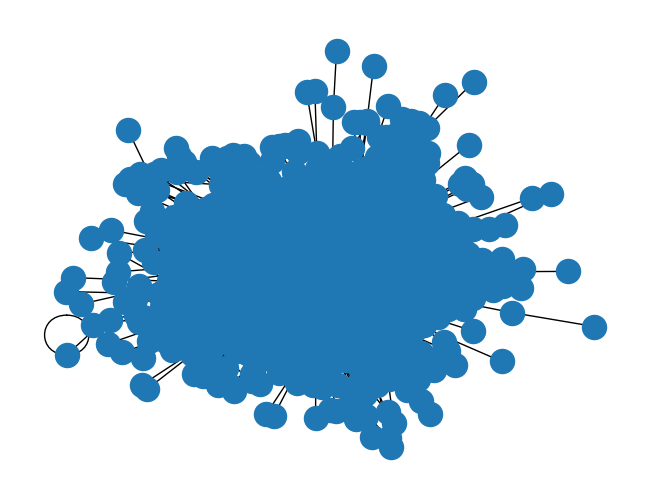

In [2]:
%matplotlib inline
import networkx as nx

G1 = nx.read_gml('../data/homework2_assignment2/friendships.gml')
nx.draw(G1)

### Question 1 (2 pkt)

Find the degree centrality, closeness centrality, and normalized betweeness centrality (excluding endpoints) of node 100.

In [ ]:
# Your Answer Here

<br>
#### For Questions 2, 3, and 4, use one of the covered centrality measures to rank the nodes and find the most appropriate candidate.
<br>

### Question 2 (2 pkt)

Suppose you are employed by an online shopping website and are tasked with selecting one user in network G1 to send an online shopping voucher to. We expect that the user who receives the voucher will send it to their friends in the network.  You want the voucher to reach as many nodes as possible. The voucher can be forwarded to multiple users at the same time, but the travel distance of the voucher is limited to one step, which means if the voucher travels more than one step in this network, it is no longer valid. Apply your knowledge in network centrality to select the best candidate for the voucher. 

In [ ]:
# Your Answer Here

### Question 3 (2 pkt)

Now the limit of the voucher’s travel distance has been removed. Because the network is connected, regardless of who you pick, every node in the network will eventually receive the voucher. However, we now want to ensure that the voucher reaches the nodes in the lowest average number of hops.

How would you change your selection strategy? Write a function to tell us who is the best candidate in the network under this condition.

In [ ]:
# Your Answer Here

### Question 4 (2 pkt)

Assume the restriction on the voucher’s travel distance is still removed, but now a competitor has developed a strategy to remove a person from the network in order to disrupt the distribution of your company’s voucher. Identify the single riskiest person to be removed under your competitor’s strategy?

In [ ]:
# Your Answer Here